## Цели практической работы

* Изучить и предобработать данные в задаче оттока.

* Научиться применять для решения задачи решающие деревья и оценивать результаты модели.

## Что входит в практическую работу

*  Загрузка и предобработка данных.
*  Применение и настройка линейных моделей.
*  Применение и настройка решающего дерева.
*  Сравнение моделей.
*  Оценка важности признаков.

## Что оценивается

Выполнены все задания ноутбука (заполнены пустые ячейки, даны ответы на вопросы).

## Что нужно сделать
Решите задачу классификации оттоковых клиентов телекома: для каждого клиента необходимо определить, перестанет он пользоваться услугами оператора в ближайшее время или нет.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("telecom_churn.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделайте первичную обработку данных:

1. Выбросите колонку State.

2. Колонки International plan и Voice mail plan закодируйте следующим образом: Yes замените на 1, а No на 0.

3. Переведите целевую переменную (Churn) в числа: True в 1, а False в 0.

In [2]:
# ваш код здесь
df_copy = df.copy()

In [3]:
df_copy.drop(columns = ['State'], axis = 1 , inplace= True)


In [4]:
df_copy[['International plan', 'Voice mail plan']] = df_copy[['International plan', 'Voice mail plan']].replace({'Yes': 1, 'No': 0})

In [5]:
df_copy['Churn'] = df_copy['Churn'].replace({True: 1, False: 0})

Выведите на экран первые строки изменённой таблицы, чтобы проверить, что все преобразования сработали.

In [6]:
# ваш код здесь
df_copy.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
df_copy.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

Создайте матрицу объект-признак X и вектор с целевой переменной (Churn) y.

In [8]:
# ваш код здесь
X = df_copy.drop(['Churn'], axis=1)
y = df_copy['Churn']

Проверьте баланс классов. Является ли выборка сбалансированной?

In [9]:
# ваш код здесь
len(y[y == 0])

2850

In [10]:
len(y[y == 1])

483

# Ответ на вопрос:
Классы не являются сбалансированными, т.к. класс со значением "0" существенно превышает класс со значение "1". Такой дисбаланс классов может приводить к неправильному определению меньшего класса.

Разбейте данные на тренировочную и тестовую части, размер тестовой части — 30%.

In [11]:
from sklearn.model_selection import train_test_split

# ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=123)

Для линейных моделей очень важно масштабирование признаков. Поэтому отмасштабируйте признаки при помощи [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), обучив метод на тренировочных данных и применив его и к трейну, и к тесту.

In [12]:
from sklearn.preprocessing import StandardScaler

# ваш код здесь
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [13]:
std_scaler.fit(X_train)

StandardScaler()

После масштабирования признаков X_train и X_test перестали быть объектами типа pd.DataFrame, это неудобно. Приведите их снова к pd.DataFrame.

In [14]:
# ваш код здесь
X_train_std = std_scaler.transform(X_train)
X_train_std

array([[-0.39155537, -0.69844975, -0.34815531, ...,  1.34071195,
        -1.30391736, -0.43062384],
       [ 1.03934808, -0.53477363, -0.34815531, ..., -0.21443608,
        -2.09934474, -1.18139735],
       [-0.31624466, -0.53477363, -0.34815531, ..., -0.21443608,
        -0.42759907, -0.43062384],
       ...,
       [ 0.58748383, -0.53477363, -0.34815531, ...,  0.95192495,
         0.47568287,  0.32014966],
       [ 1.44100519, -0.53477363, -0.34815531, ...,  0.17435093,
         0.04426463, -0.43062384],
       [ 0.11051601, -0.69844975,  2.87228132, ..., -0.99201009,
         0.15211919, -0.43062384]])

In [15]:
variables = ['Account length std', 'Area code std', 'International plan std', 'Voice mail plan std', 
             'Number vmail messages std', 'Total day minutes std', 'Total day calls std', 
             'Total day charge std', 'Total eve minutes std', 'Total eve calls std', 
             'Total eve charge std', 'Total night minutes std', 'Total night calls std', 
             'Total night charge std', 'Total intl minutes std', 'Total intl calls std', 
             'Total intl charge std', 'Customer service calls std']

In [16]:
std_scaler.fit(X_test)

StandardScaler()

In [17]:
X_test_std = std_scaler.transform(X_test)
X_test_std

array([[-0.74955653, -0.51881366,  3.13939707, ..., -0.60082438,
         1.20057595,  1.10218297],
       [ 0.30556384,  1.73300783, -0.3185325 , ...,  0.22870777,
         0.59422811,  0.33769707],
       [-1.40272628,  1.73300783, -0.3185325 , ...,  0.64347385,
        -0.82937116,  0.33769707],
       ...,
       [-1.17662905, -0.51881366,  3.13939707, ..., -0.60082438,
        -0.03848268, -0.42678883],
       [-0.12150869, -0.68473735, -0.3185325 , ...,  0.64347385,
         0.69967991, -0.42678883],
       [ 0.7828802 , -0.51881366, -0.3185325 , ...,  1.05823992,
        -1.10618213,  0.33769707]])

Обучите на тренировочных данных с параметрами по умолчанию:

1) логистическую регрессию;

2) метод опорных векторов (с kernel='linear').

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# ваш код здесь
model_lr =LogisticRegression()

In [19]:
model_lr.fit(X_train_std, y_train)

LogisticRegression()

In [20]:
model_svc = SVC(kernel='linear')

In [21]:
model_svc.fit(X_train_std, y_train)

SVC(kernel='linear')

In [22]:
preds_lr = model_lr.predict(X_test_std)
preds_lr

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
preds_svc = model_svc.predict(X_test_std)
preds_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

С помощью обученных моделей сделайте предсказание на тестовых данных. Вычислите значение метрики roc-auc на тесте. 

Не забудьте, что для корректного вычисления roc-auc необходимо предсказывать не сами классы, а их вероятности (чтобы SVC мог это сделать, при объявлении модели поставьте probability=True).

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds_lr)
# ваш код здесь

0.5995764661165351

In [25]:
roc_auc_score(y_test, preds_svc)

0.5

Теперь обучите решающее дерево с параметрами по умолчанию на тренировочных данных, сделайте предсказание на тесте и вычислите на тесте roc-auc.

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
# ваш код здесь

In [27]:
std_scaler.fit(X)

StandardScaler()

In [28]:
X_std = std_scaler.transform(X)

In [29]:
df_new = pd.DataFrame()

In [30]:
df_new[variables] = X_std
df_new.head()

,Account length std,Area code std,International plan std,Voice mail plan std,Number vmail messages std,Total day minutes std,Total day calls std,Total day charge std,Total eve minutes std,Total eve calls std,Total eve charge std,Total night minutes std,Total night calls std,Total night charge std,Total intl minutes std,Total intl calls std,Total intl charge std,Customer service calls std
0,0.676489,-0.523603,-0.327580,1.617086,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,-0.523603,-0.327580,1.617086,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.523603,-0.327580,-0.618396,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,-0.688834,3.052685,-0.618396,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,-0.523603,3.052685,-0.618396,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


In [31]:
X_std = df_new

Нужно ли масшабировать признаки для обучения решающего дерева? Проверьте это, заново разбив данные на тренировочную и тестовую части (назовите новые полученные объекты новыми названиями), и проведите обучение, предсказание и оценку метрики до масштабирования и после.

In [32]:
# ваш код здесь
X_train, X_test, y_train, x_test = train_test_split(X, y, train_size=0.3, random_state=123)

In [33]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
preds_dtc = model_dtc.predict(X_test)

In [35]:
roc_auc_score(y_test, preds_dtc)

0.8127212504506082

In [36]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size=0.3, random_state=123)

In [37]:
model_dtc.fit(X_train_std, y_train_std)

DecisionTreeClassifier()

In [38]:
preds_dtc_std = model_dtc.predict(X_test_std)

In [39]:
roc_auc_score(y_test_std, preds_dtc_std)

0.8416893592085761

Какой вывод про масштабирование признаков для обучения дерева можно сделать?

# Ответ на вопрос:
Я произвел обучение Дерева решения как на обычных, так и на масштабированных данных. Т.к. метрика ROC-AUC в случае обработки масштабированных данных выше, это значит, что модель луше вопроизводит результаты тестовых данных. Поэтому масштабирование данных при использовании дерева решений имеет смысл.

Теперь ваша цель — максимально улучшить модели. Для этого:

1) у линейных моделей подберите гиперпараметр С (переберите 20 значений C в диапазоне от 0.1 до 10 с равным шагом);

2) у решающего дерева подберите max_depth (переберите глубину от 1 до 10 с шагом 1) и criterion — gini или entropy (см. [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)).

Для подбора параметров используйте [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) с пятью фолдами и метрикой roc-auc или обычные циклы.

Подбор параметров осуществляется только по тренировочным данным!

После подбора гиперпараметров обучите модели с найденными гиперпараметрами на тренировочных данных, сделайте предсказания на тесте и оцените их качество (roc_auc).

In [40]:
from sklearn.model_selection import GridSearchCV

# ваш код здесь
params = {'C': np.arange(0.1, 10, 0.5)}

In [41]:
gs1 = GridSearchCV(estimator=model_lr, param_grid=params, cv=5, scoring='roc_auc')

In [42]:
gs1.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6])},
             scoring='roc_auc')

In [43]:
gs1.best_params_

{'C': 8.6}

In [44]:
model_lr_1 = LogisticRegression(C = 8.6)

In [45]:
model_lr_1.fit(X_train_std, y_train_std)

LogisticRegression(C=8.6)

In [46]:
preds_lr_1 = model_lr_1.predict(X_test_std)

In [47]:
roc_auc_score(y_test_std, preds_lr_1)

0.5963513839578091

In [48]:
gs2 = GridSearchCV(estimator=model_svc, param_grid=params, cv=5, scoring='roc_auc')

In [49]:
gs2.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1,
       6.6, 7.1, 7.6, 8.1, 8.6, 9.1, 9.6])},
             scoring='roc_auc')

In [50]:
gs2.best_params_

{'C': 0.1}

In [51]:
model_svc_1 = SVC(C = 0.1, kernel = 'linear')

In [52]:
model_svc_1.fit(X_train_std, y_train_std)

SVC(C=0.1, kernel='linear')

In [53]:
preds_svc_1 = model_svc_1.predict(X_test_std)

In [54]:
roc_auc_score(y_test_std, preds_svc_1)

0.5

In [55]:
params_grid = {
    'max_depth': np.arange(1, 11, 1),
    'criterion': ['gini', 'entropy']
}

In [56]:
gs3 = GridSearchCV(estimator = model_dtc, param_grid = params_grid, cv = 5, scoring = 'roc_auc')

In [57]:
gs3.fit(X_train_std, y_train_std)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='roc_auc')

In [58]:
gs3.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [59]:
model_dtc_1 = DecisionTreeClassifier(max_depth = 5, criterion = 'gini')

In [60]:
model_dtc_1.fit(X_train_std, y_train_std)

DecisionTreeClassifier(max_depth=5)

In [61]:
preds_dtc_1 = model_dtc_1.predict(X_test_std)

In [62]:
roc_auc_score(y_test_std, preds_dtc_1)

0.8417755334183586

Какая модель справилась с решением задачи лучше всего по метрике roc-auc?

# Ответ на вопрос:
Исходя из полученных значений метрики ROC-AUC наилучший результат дает Decision Tree Classifier.

Нарисуйте roc-кривую для наилучшей модели.

Text(0, 0.5, 'tpr')

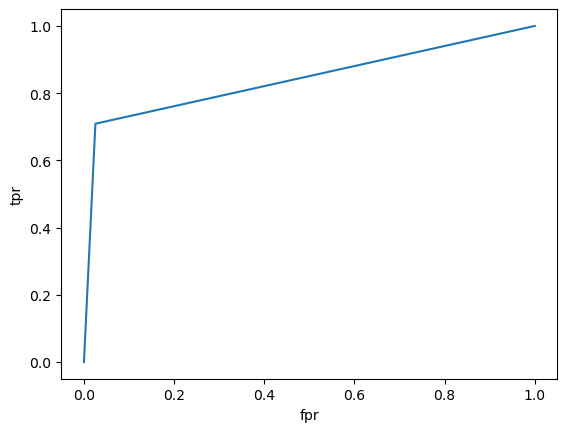

In [63]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# ваш код здесь
fpr, tpr, _ = roc_curve(y_test_std, preds_dtc_1)


plt.plot(fpr, tpr, '-')
plt.xlabel('fpr')
plt.ylabel('tpr')

Сравните между собой две лучшие модели:

1. Насколько сильно отличается качество предсказания на тестовых данных?
(Вычислите разность значений roc-auc.)

2. Постройте гистограммы важности признаков (для линейных моделей берите модуль значений весов) для каждой из этих моделей. Сравните между собой списки из трёх самых важных признаков. Совпадают ли они?

In [64]:
# ваш код здесь
delta_roc_auc = roc_auc_score(y_test_std, preds_dtc_1) - roc_auc_score(y_test_std, preds_lr_1)
delta_roc_auc

0.24542414946054958

In [65]:
# ваш код здесь
features = X_std.columns
coeffs = np.abs(model_lr_1.coef_)
#interc = model_lr_1.intercept_
importances_lr = np.hstack((coeffs))
indices = np.argsort(importances_lr)

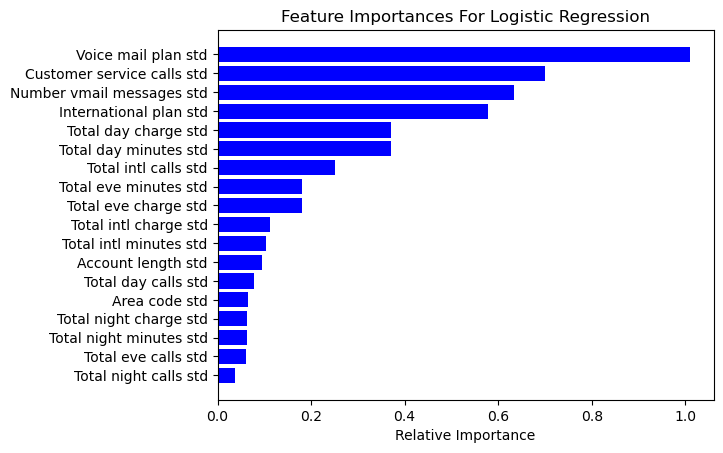

In [66]:
plt.title('Feature Importances For Logistic Regression')
plt.barh(range(len(indices)), importances_lr[indices], color = 'b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
features = X_std.columns
coeffs_svc = np.abs(model_svc_1.coef_)
#interc_svc = model_svc_1.intercept_
importances_svc = np.hstack((coeffs_svc))
indices_svc = np.argsort(importances_svc)

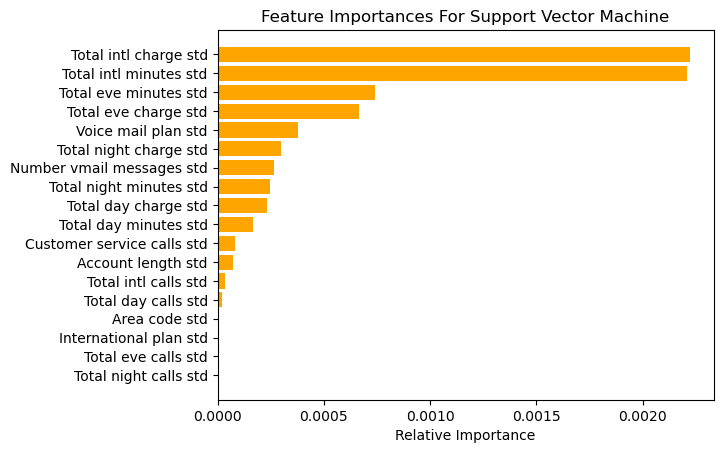

In [68]:
plt.title('Feature Importances For Support Vector Machine')
plt.barh(range(len(indices_svc)), importances_svc[indices_svc], color = 'orange', align='center')
plt.yticks(range(len(indices_svc)), [features[i] for i in indices_svc])
plt.xlabel('Relative Importance')
plt.show()

In [69]:
features = X_std.columns
importances_dtc = model_dtc_1.feature_importances_
indices_dtc = np.argsort(importances_dtc)

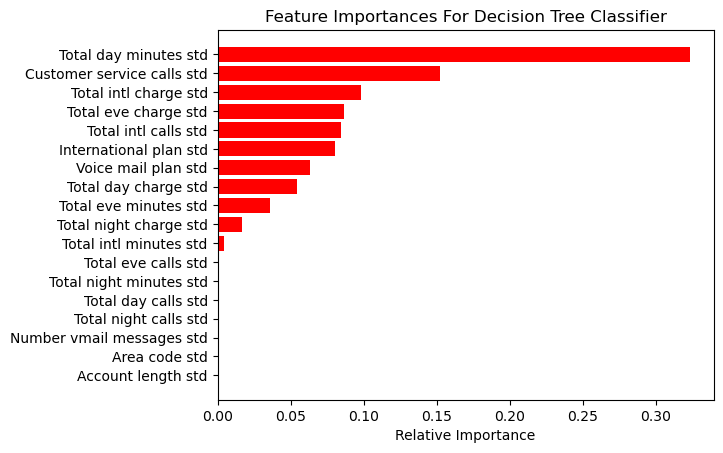

In [70]:
plt.title('Feature Importances For Decision Tree Classifier')
plt.barh(range(len(indices_dtc)), importances_dtc[indices_dtc], color = 'r', align='center')
plt.yticks(range(len(indices_dtc)), [features[i] for i in indices_dtc])
plt.xlabel('Relative Importance')
plt.show()

Сделайте выводы:

1. Являются ли данные сбалансированными? Что это означает?

2. Какая модель после подбора гиперпараметров лучше всего решает задачу с точки зрения метрики roc-auc?

3. Одинаковые ли признаки важны для работы двух наилучших моделей? Почему?

# Ответ на вопросы
1) Ответ на первый вопрос дал выше
2) После подбора гиперпараметров аилучшее решение дает Descision Tree Classifier, т.к. значение метрики ROC-AUC для данной модели имеет наибольшее значение
3) Если обратит внимание на представленные выше гистограммы, то можно увидеть, что три самых важных признака для каждой их трех моделей отличаются. Так для Логистической регресси тремя самыми важными рпизнаками являеются Voice mail plan, Customer Service Calls, Number Vmail Messages. Для метода опорных векторов - Total Intl Charge, Total Intl Minutes, Tatal Eve Minutes. Для решающего дерева - Total Day Minutes, Customer Service Calls, Total Intl Charge. В некоторых случаях эти признаки совпадают, но при этом занимают разные места по значимости в модели.